In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('weatherAUS.csv')

In [4]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# for more than 3000 row the target data was ot there we have no use with that we have remove to with the null values of raintoday and tomorrow

In [6]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

# Exploratory data analysis and visualization

In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

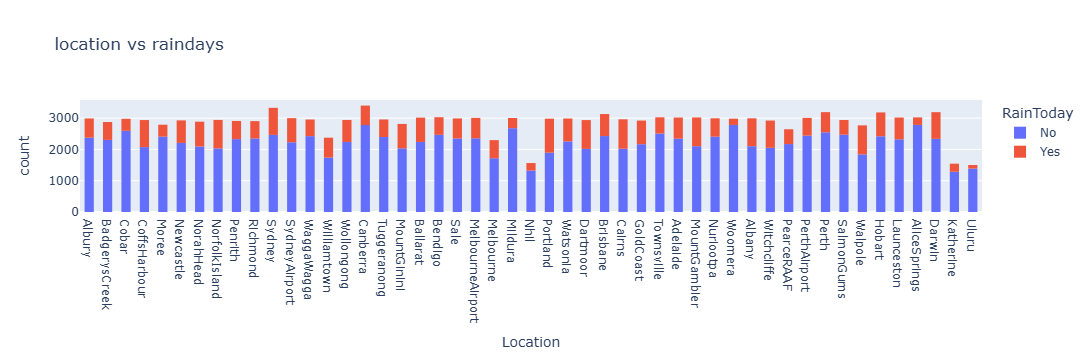

In [10]:
fig=px.histogram(df,x='Location',title='location vs raindays',color='RainToday')
fig.update_layout(bargap=0.5)
fig.show()

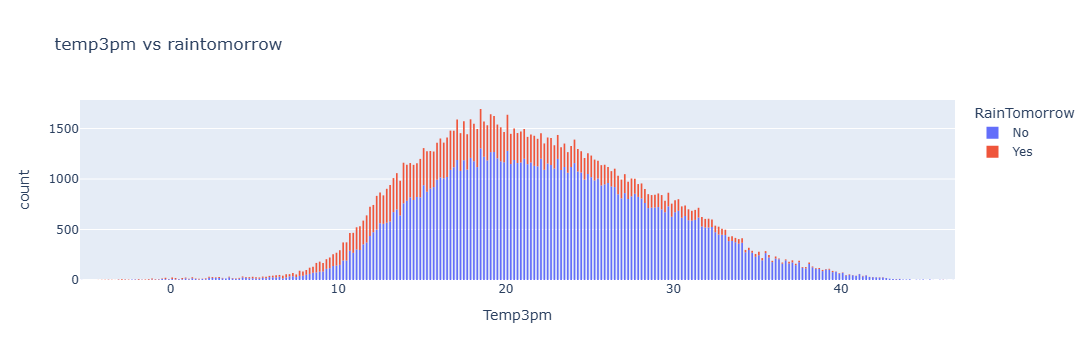

In [11]:
fig=px.histogram(df,x='Temp3pm',title='temp3pm vs raintomorrow',color='RainTomorrow')
fig.update_layout(bargap=0.5)
fig.show()

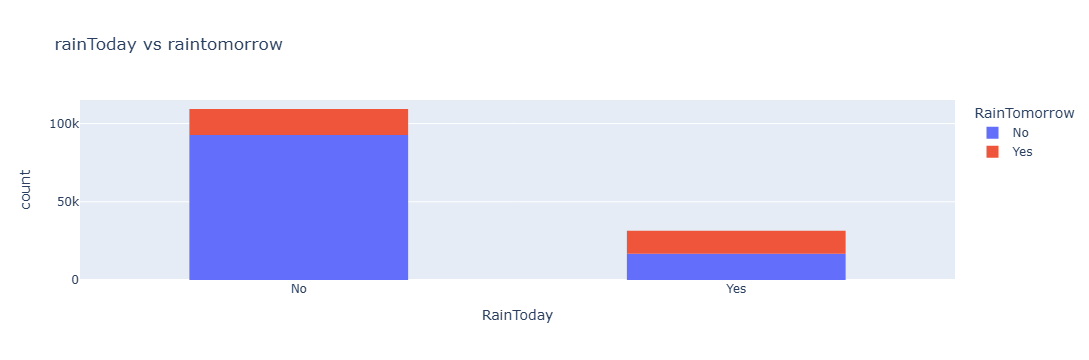

In [12]:
fig=px.histogram(df,x='RainToday',title='rainToday vs raintomorrow',color='RainTomorrow')
fig.update_layout(bargap=0.5)
fig.show()

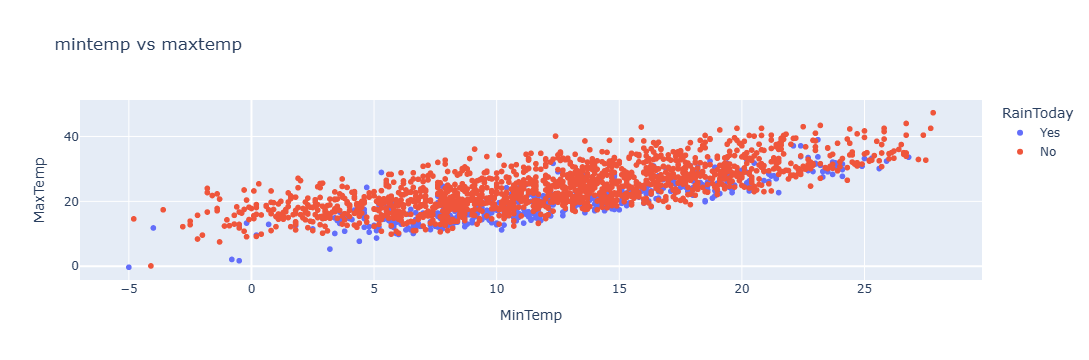

In [13]:
px.scatter(df.sample(2000),x='MinTemp',
           y='MaxTemp'
           ,color='RainToday',
           title='mintemp vs maxtemp')


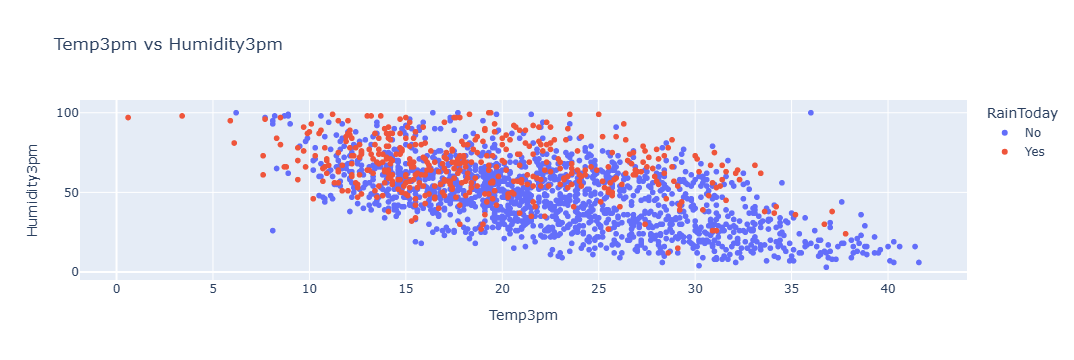

In [14]:
px.scatter(df.sample(2000),x='Temp3pm',
           y='Humidity3pm'
           ,color='RainToday',
           title='Temp3pm vs Humidity3pm')

<Axes: >

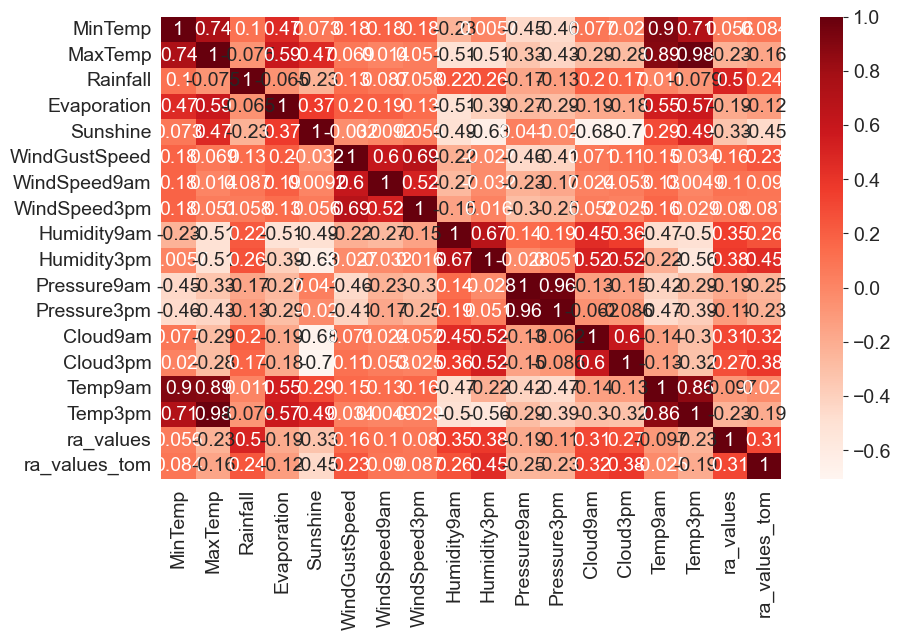

In [15]:
rainToday_vau={'No':0,'Yes':1}
ra_valu=df.RainToday.map(rainToday_vau)
ra_valTo=df.RainTomorrow.map(rainToday_vau)
df['ra_values']=ra_valu
df['ra_values_tom']=ra_valTo
sns.heatmap(df.corr(numeric_only=True),cmap='Reds',annot=True)

# we are dividing into train test normally the dataset will be divided into 3 sets
### 1) train data set (60 percent)
### 2) validation set -> for the train itself(20 percent)
### 3) test dataset(20 percent)

In [16]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df,test_df=train_test_split(df,test_size=0.20,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

### normally with date in the dataset we can not use future value to train for predict the past so we are  divide based on the dates